<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# COVID-19 landscape

...Intro COVID...

With the goal to reassess the situation regarding the number of cases and deaths ocurring in Brazil and also worldwide, in this notebook I will analyse recent data from [Our World in Data](https://ourworldindata.org/) regarding COVID-19 infections/vaccination globally. Later on, I will analyse data specific to Brazil.

### Importing necessary packages

In [184]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import re
import tools

# getting plots to work in ipynb
%matplotlib inline

plt.style.use('dark_background')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.stretch'] = 'normal'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.variant'] = 'normal'

## Getting the data

*Descreva a fonte dos seus dados e um breve resumo sobre o que se pode esperar desse dataset.*

*Fale sobre a dificuldade de se analisar uma doença novas, os conflitos existentes entre os dados dos governos federal, estaduais e os não oficiais.*

### Variables codebook

The description of each variable was obtained from the [dataset codebook](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv), as provided by Our World in Data. 

<details>
<summary> Click on the arrow to see the entire codebook. </summary>
  
* `iso_code` = The ISO 3166-1 alpha 3 codes representing the country names.
* `continent` = Continent of the geographical location.
* `location` = Geographical location. This variable also contains classification based on country income or entire continents.
* `date` = Data of the observation.
* `total_cases` = Total number of confirmed cases up until the date specified. Can include probable cases, where reported.
* `new_cases` = New confirmed cases. Can include probable cases, where reported. Negative values are replaced with NAs when the input was subject to data corretion.
* `new_cases_smoothed` = Same as above, 7-day smoothed.
* `total_deaths` = Total deaths attributed to COVID-19. Can include probable deaths, where reported.
* `new_deaths` = New deaths attributed to COVID-19. Can include probable deaths, where reported. Negative values are replaced with NAs when the input was subject to data corretion.
* `new_deaths_smoothed` = Same as above, 7-day smoothed.
* `total_cases_per_million` = Total cases per 1,000,000 people. Can include probable cases, where reported.
* `new_cases_per_million` = New confirmed cases per 1,000,000 people. Can include probable cases, where reported.
* `new_cases_smoothed_per_million` = Same as above, 7-day smoothed.
* `total_deaths_per_million` = Total deaths attributed to COVID-19 per 1,000,000 people. Can include probable deaths, where reported.
* `new_deaths_per_million` = New deaths attributed to COVID-19 per 1,000,000 people. Can include probable deaths, where reported.
* `new_deaths_smoothed_per_million` = Same as above, 7-day smoothed.
* `reproduction_rate` = Real time estimated of the effective reproductive rate (R) of COVID-19. For more info, see this [link](https://github.com/crondonm/TrackingR/tree/main/Estimates-Database).
* `icu_patients` = Number of COVID-19 patients in intensive care units (ICUs) on a given day.
* `icu_patients_per_million` = Same as above, per 1,000,000 people.
* `hosp_patients` = Number of COVID-19 patients in hospital on a given day.
* `hosp_patients_per_million` = Same as above, per 1,000,000 people.
* `weekly_icu_admissions` = Number of COVID-19 patients admitted to ICUs in a given week.
* `weekly_icu_admissions_per_million` = Same as above, per 1,000,000 people.
* `weekly_hosp_admissions` = Number of COVID-19 patients in hospital in a given week.
* `weekly_hosp_admissions_per_million` = Same as above, per 1,000,000 people.
* `total_tests` = Total tests for COVID-19.
* `new_tests` = New tests for COVID-19 (for consecutive days, only).
* `total_tests_per_thousand` = Total tests per 1,000 people.
* `new_tests_per_thousand` = New tests por 1,000 people.
* `new_tests_smoothed` = New tests, 7-day smoothed (assuming tests changed equally for countries that did not report daily testing).
* `new_tests_smoothed_per_thousand` = Same as above, per 1,000 people.
* `positive_rate` = Share of positive tests, as a rolling 7-day average (the inverse of tests_per_case).
* `tests_per_case` = Tests conducted per new confirmed case, as a rolling 7-day average.
* `tests_units` = Units used by the location to report its test data.
* `total_vaccinations` = Total number of vaccination doses administered.
* `people_vaccinated` = Total number of people with at least one dose of the vaccine.
* `people_fully_vaccinated` = Total number of people with all doses as per the initial vaccination protocol.
* `total_boosters` = Total number of booster doses administered (beyond the initial protocol).
* `new_vaccinations` = New doses administered.
* `new_vaccinations_smoothed` = Sabe as amove, 7-day smoothed (assuming vaccination changed equally for countries that did not report daily).
* `total_vaccinations_per_hundred` = Total number of doses administered per 100 people in the total population.
* `people_vaccinated_per_hundred` = Total number of people vaccinated with at least one dose per 100 people.
* `people_fully_vaccinated_per_hundred` = Total number of people with all doses (based on the initial protocol) per 100 people.
* `total_boosters_per_hundred` = Total number of vaccine boosters administered per 100 people.
* `new_vaccinations_smoothed_per_million` = New vaccines administered, 7-day smoothed, per 1,000,000 people.
* `new_people_vaccinated_smoothed` = Daily number of people receiving the first dose, 7-day smoothed.
* `new_people_vaccinated_smoothed_per_hundred` = Same as above, per 100 people.
* `stringency_index` = Government Response Stringency Index: composite measure based on response indicators, rescaled to a value from 0 to 100 (100 = strictest response).
* `population` = Latest available population values.
* `population_density` = Number of people by land area, in square km, for the most recent available year.
* `median_age` = Median age, UN projection for 2020.
* `aged_65_older` = Share of the population >= 65 years, for the most recent year.
* `aged_70_older` = Share of the population >= 70 years in 2015.
* `gdp_per_capita` = Gross domestic product at purchasing power parity (constant 2011 international dollars), for the most recent available year.
* `extreme_poverty` = Share of the population living in extreme poverty (most recent available year since 2010).
* `cardiovasc_death_rate` = Death rate of cardiovascular disease in 2017 (per 100,00 people).
* `diabetes_prevalence` = Diabetes prevalence (% of population aged 20 to 79) in 2017.
* `female_smokers` = Share of women who smoke, most recent year available.
* `male_smokers` = Share of men who smoke, most recent year avaiable.
* `handwashing_facilities` = Share of the population with basic handwashing facilities on premises, most recent year available.
* `hospital_beds_per_thousand` = Hospoital beds per 1,000 people, most recent year available since 2010.
* `life_expectancy` = Life expectancy at birth in 2019.
* `human_development_index` = 2019 values of HDI, measuring average achievement in three basic dimensions of human develompment (long and healthy life, knowledge and decent standard of living).
* `excess_mortality_cumulative_absolute` = Percentage difference between the reported number of weekly or monthly deaths in 2020-2921 and the projected number of deaths for the same period based on preivous years.
* `excess_mortality_cumulative` = Percentage difference between the cumulative number of deaths since 1 January 2020 and the cumulative projected deaths for the same period based on preivous years.
* `excess_mortality` = Cumulative difference between the reported number of deaths since 1 January 2020 and the projected number of deaths for the same period based on previous years.
* `excess_mortality_cumulative_per_million` = Same as above, per 1,000,000 people.
</details>

In this notebook, only the variables below will be used:

| Variable | Description |
|:-:|:-:|
| `iso_code` | The ISO 3166-1 alpha 3 codes representing the country names|
| `continent` | Continent of the geographical location|
| `location` | Geographical location. This variable also contains classification based on country income or entire continents|
| `date` | Data of the observation|
| `total_cases` | Total number of confirmed cases up until the date specified. Can include probable cases, where reported|
| `new_cases` | New confirmed cases. Can include probable cases, where reported. Negative values are replaced with NAs when the input was subject to data corretion|
| `new_cases_smoothed` | Same as above, 7-day smoothed|
| `total_deaths` | Total deaths attributed to COVID-19. Can include probable deaths, where reported|
| `new_deaths` | New deaths attributed to COVID-19. Can include probable deaths, where reported. Negative values are replaced with NAs when the input was subject to data corretion|
| `new_deaths_smoothed` | Same as above, 7-day smoothed|
| `total_cases_per_million` | Total cases per 1,000,000 people| Can include probable cases, where reported|
| `new_cases_per_million` | New confirmed cases per 1,000,000 people. Can include probable cases, where reported|
| `new_cases_smoothed_per_million` | Same as above, 7-day smoothed|
| `total_deaths_per_million` | Total deaths attributed to COVID-19 per 1,000,000 people. Can include probable deaths, where reported|
| `new_deaths_per_million` | New deaths attributed to COVID-19 per 1,000,000 people. Can include probable deaths, where reported|
| `new_deaths_smoothed_per_million` | Same as above, 7-day smoothed|
| `total_tests` | Total tests for COVID-19 |
| `total_vaccinations` | Total number of vaccination doses administered|
| `people_vaccinated` | Total number of people with at least one dose of the vaccine|
| `people_fully_vaccinated` | Total number of people with all doses as per the initial vaccination protocol|
| `total_boosters` | Total number of booster doses administered (beyond the initial protocol)|
| `new_vaccinations` | New doses administered|
| `new_vaccinations_smoothed` | Sabe as amove, 7-day smoothed (assuming vaccination changed equally for countries that did not report daily)|
| `total_vaccinations_per_hundred` | Total number of doses administered per 100 people in the total population|
| `people_vaccinated_per_hundred` | Total number of people vaccinated with at least one dose per 100 people|
| `people_fully_vaccinated_per_hundred` | Total number of people with all doses (based on the initial protocol) per 100 people|
| `total_boosters_per_hundred` | Total number of vaccine boosters administered per 100 people|
| `new_vaccinations_smoothed_per_million` | New vaccines administered, 7-day smoothed, per 1,000,000 people|
| `new_people_vaccinated_smoothed` | Daily number of people receiving the first dose, 7-day smoothed|
| `new_people_vaccinated_smoothed_per_hundred` | Same as above, per 100 people|
| `gdp_per_capita` | Gross domestic product at purchasing power parity (constant 2011 international dollars), for the most recent available year|
| `human_development_index` | 2019 values of HDI, measuring average achievement in three basic dimensions of human develompment (long and healthy life, knowledge and decent standard of living)|
| `population` | Latest available population values|


### Importing COVID-19 data

The data used here was obtained from [*Our World in Data*](https://github.com/owid/covid-19-data/tree/master/public/data) on 21/03/2022. To begin, let's start by loading the referred dataset as a dataframe.

In [185]:
# importing dataset into a dataframe
df_full = pd.read_csv("./data/owid-covid-data.csv")


#  # getting all column names to describe variables above
# for column in df.columns:
#     print("* `{}` = " .format(column))

## Exploratory analysis

Let's start by looking at our dataset and its size.

In [186]:
# checking dataset entries
df_full.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [187]:
# checking dataset size
df_full.shape

(169939, 67)

We can see that our dataset contains almost 170,000 observations. Parsing the date column and checking it:

In [188]:
# converting 'date' to datetime
df_full.date = pd.to_datetime(df_full.date)

# checking if it worked
df_full.date.dtype.type

numpy.datetime64

This dataset contains several variables that are not of interest at this moment. A dataframe subset will be created, based on the variables that are going to be used in this analysis (mentioned in the section above).

In [189]:
# defining columns of intereset
col_int = ['iso_code',
           'continent', 
           'location', 
           'date', 
           'total_cases', 
           'new_cases', 
           'new_cases_smoothed', 
           'total_deaths', 
           'new_deaths', 
           'new_deaths_smoothed',
           'total_cases_per_million',
           'new_cases_per_million',
           'new_cases_smoother_per_million',
           'total_deaths_per_million',
           'new_deaths_per_million',
           'new_deaths_smoothed_per_million',
           'total_tests',
           'total_vaccinations',
           'people_vaccinated',
           'people_fully_vaccinated',
           'total_boosters',
           'new_vaccinations',
           'new_vaccinations_smoothed',
           'total_vaccinations_per_hundred',
           'people_vaccinated_per_hundred',
           'total_boosters_per_hundred',
           'new_vaccinations_smoothed_per_million',
           'new_people_vaccinated_smoothed',
           'new_people_vaccinated_smoothed_per_hundred',
           'gdp_per_capita',
           'human_development_index',
           'population'
           ]

df = df_full.filter(col_int)

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,gdp_per_capita,human_development_index,population
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0


Checking if the variable types match their content:

In [190]:
# checking data types
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # to display more than the limit of rows in jupyter
    print(df.dtypes)

iso_code                                              object
continent                                             object
location                                              object
date                                          datetime64[ns]
total_cases                                          float64
new_cases                                            float64
new_cases_smoothed                                   float64
total_deaths                                         float64
new_deaths                                           float64
new_deaths_smoothed                                  float64
total_cases_per_million                              float64
new_cases_per_million                                float64
total_deaths_per_million                             float64
new_deaths_per_million                               float64
new_deaths_smoothed_per_million                      float64
total_tests                                          float64
total_vaccinations      

The types of the variables make sense. Now, how many null values are present in the dataset?

In [191]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print((df.isnull().sum()/df.shape[0]).sort_values(ascending=False))

total_boosters_per_hundred                    0.890372
total_boosters                                0.890372
new_vaccinations                              0.774713
people_fully_vaccinated                       0.756171
people_vaccinated_per_hundred                 0.740301
people_vaccinated                             0.740301
total_vaccinations_per_hundred                0.727037
total_vaccinations                            0.727037
total_tests                                   0.587952
new_people_vaccinated_smoothed_per_hundred    0.487716
new_people_vaccinated_smoothed                0.487716
new_vaccinations_smoothed                     0.483014
new_vaccinations_smoothed_per_million         0.483014
human_development_index                       0.181530
gdp_per_capita                                0.167784
new_deaths_smoothed_per_million               0.141521
new_deaths_smoothed                           0.137084
total_deaths_per_million                      0.129188
new_deaths

Most of the variables have missing values, except for `date`, `location` and `iso_code`. The absence of such data can be explained by the fact that differente variables probably started to be recorded at different timepoints in different locations since the pandemic started. This is best exemplified by the vaccination data, since we know how much the vaccine availability was delayed in some countries (such as Brazil). Therefore, it is not wise to remove these missing values, because they serve as a waystone to when the recording of such data began.

Before proceeding, let's check what is the most recent date recorded on the dataset.

In [192]:
# what is the most recent date in the dataset
df.date.sort_values(ascending=False)[0:1]

169938   2022-03-20
Name: date, dtype: datetime64[ns]

## Analysing COVID-19 data

By looking at the `location` and `iso_code` variables, it is possible to see that there are entries in the dataset that do not correspond to countries. Instead, these entries refer to other ways in which the data is stored in the dataset: values grouped by **continent** and **country income** (Classifications made by [The World Bank](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups). The details about each category are available [here](https://github.com/owid/covid-19-data/blob/master/scripts/input/wb/income_groups.csv)).

### Extracting the data

In [193]:
# subsetting data that represent world/continents/classes
df_owid = df.loc[df.iso_code.str.startswith('OWID_')]

# checking all observations that match and counting how many entries
df_owid[['iso_code', 'location']].value_counts()


iso_code  location           
OWID_ASI  Asia                   789
OWID_HIC  High income            789
OWID_LMC  Lower middle income    789
OWID_NAM  North America          789
OWID_UMC  Upper middle income    789
OWID_WRL  World                  789
OWID_EUN  European Union         788
OWID_EUR  Europe                 788
OWID_OCE  Oceania                786
OWID_INT  International          773
OWID_AFR  Africa                 767
OWID_SAM  South America          758
OWID_LIC  Low income             757
OWID_KOS  Kosovo                 737
OWID_CYN  Northern Cyprus        317
dtype: int64

The dataset lacks information about the *Internationl* classification, so we will ignore it for now. But there are two values that should be included as countries for our analysis: *Kosovo* and *Northern Cyprus*. Let us return them to the main dataframe:

In [194]:
# dropping international values
df_owid = df_owid[df_owid.location != 'International']

# checking all observations that match and counting how many entries
df_owid[['iso_code', 'location']].value_counts()

iso_code  location           
OWID_ASI  Asia                   789
OWID_HIC  High income            789
OWID_LMC  Lower middle income    789
OWID_NAM  North America          789
OWID_UMC  Upper middle income    789
OWID_WRL  World                  789
OWID_EUN  European Union         788
OWID_EUR  Europe                 788
OWID_OCE  Oceania                786
OWID_AFR  Africa                 767
OWID_SAM  South America          758
OWID_LIC  Low income             757
OWID_KOS  Kosovo                 737
OWID_CYN  Northern Cyprus        317
dtype: int64

In [195]:
# removing other classifications from the main dataframe
df = df.loc[~df.iso_code.str.match('^OWID_(?!KOS|CYN)')]

# checking
df.loc[df.iso_code.str.startswith('OWID_')][['iso_code', 'location']].value_counts()

iso_code  location       
OWID_KOS  Kosovo             737
OWID_CYN  Northern Cyprus    317
dtype: int64

Now let's check the first 5 entries, based on `total_deaths`, on the continent/income data:

In [196]:
df_owid.loc[df_owid.date == "2022-03-20"].sort_values(by="total_deaths", ascending=False).head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,gdp_per_capita,human_development_index,population
167764,OWID_WRL,NaN,World,2022-03-20,470737068.0,1023616.0,1769491.143,6077582.0,3022.0,5174.143,...,16694679.0,139.73,64.00,18.61,2120.0,2756698.0,0.035,15469.207,0.737,7.874966e+09
162217,OWID_UMC,NaN,Upper middle income,2022-03-20,123064003.0,121290.0,177814.000,2476195.0,1182.0,1585.286,...,6748395.0,195.24,80.95,31.30,2685.0,554526.0,0.022,NaN,NaN,2.513673e+09
68084,OWID_HIC,NaN,High income,2022-03-20,258372770.0,722989.0,1306109.286,2266661.0,1286.0,2972.571,...,1984348.0,192.97,78.90,43.49,1633.0,147042.0,0.012,NaN,NaN,1.214930e+09
51129,OWID_EUR,NaN,Europe,2022-03-20,171892361.0,392063.0,757955.429,1753751.0,893.0,1829.714,...,487027.0,166.90,67.98,37.82,650.0,101908.0,0.014,NaN,NaN,7.489630e+08
114552,OWID_NAM,NaN,North America,2022-03-20,94091488.0,14991.0,43522.000,1403035.0,257.0,1077.000,...,652426.0,159.33,71.18,22.11,1094.0,98343.0,0.016,NaN,NaN,5.965813e+08


Now, we create two separate dataframes, one for income-based data and the other for data regarding the continents and the World:

In [197]:
# creating lists
income_list = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
continent_list = ['Asia', 'Europe', 'Oceania', 'Africa', 'South America', 'North America']

# separating income-based data
df_income = df_owid.loc[df_owid.location.isin(income_list)]
df_income.location.value_counts()


High income            789
Lower middle income    789
Upper middle income    789
Low income             757
Name: location, dtype: int64

In [198]:
df_income.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,gdp_per_capita,human_development_index,population
67296,OWID_HIC,NaN,High income,2020-01-22,6.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.214930e+09
67297,OWID_HIC,NaN,High income,2020-01-23,12.0,6.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.214930e+09
67298,OWID_HIC,NaN,High income,2020-01-24,21.0,9.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.214930e+09
67299,OWID_HIC,NaN,High income,2020-01-25,25.0,4.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.214930e+09
67300,OWID_HIC,NaN,High income,2020-01-26,43.0,18.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.214930e+09


In [199]:
# separating continent based data
df_continent = df_owid.loc[df_owid.location.isin(continent_list)]
df_continent.location.value_counts()

Asia             789
North America    789
Europe           788
Oceania          786
Africa           767
South America    758
Name: location, dtype: int64

In [200]:
df_continent.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,gdp_per_capita,human_development_index,population
756,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.373486e+09
757,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.373486e+09
758,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.373486e+09
759,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.373486e+09
760,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.373486e+09


### Continent-based analysis

We will start by looking at the data from the **continent** point of view. Thus, we separate the data from the most recent entry in the dataset.

In [201]:
# Extracting and ordering by most deaths
top5MostDeaths_continent = df_continent.loc[df_continent.date == "2022-03-20"].sort_values(by="total_deaths", ascending=False)
top5MostDeaths_continent


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,gdp_per_capita,human_development_index,population
51129,OWID_EUR,NaN,Europe,2022-03-20,171892361.0,392063.0,757955.429,1753751.0,893.0,1829.714,...,487027.0,166.90,67.98,37.82,650.0,101908.0,0.014,NaN,NaN,7.489630e+08
114552,OWID_NAM,NaN,North America,2022-03-20,94091488.0,14991.0,43522.000,1403035.0,257.0,1077.000,...,652426.0,159.33,71.18,22.11,1094.0,98343.0,0.016,NaN,NaN,5.965813e+08
9087,OWID_ASI,NaN,Asia,2022-03-20,132993357.0,523980.0,839436.000,1389465.0,1496.0,1656.857,...,12538736.0,160.20,73.56,18.86,2680.0,1414927.0,0.030,NaN,NaN,4.678445e+09
142529,OWID_SAM,NaN,South America,2022-03-20,55598961.0,32692.0,60813.000,1271657.0,341.0,537.714,...,1180883.0,183.75,82.95,31.65,2719.0,148408.0,0.034,NaN,NaN,4.342601e+08
1522,OWID_AFR,NaN,Africa,2022-03-20,11460017.0,1383.0,4080.000,251180.0,12.0,41.857,...,1737858.0,32.04,20.11,1.13,1265.0,983776.0,0.072,NaN,NaN,1.373486e+09
117164,OWID_OCE,NaN,Oceania,2022-03-20,4700163.0,58507.0,63684.714,8479.0,23.0,31.000,...,97749.0,162.52,65.89,35.17,2262.0,9336.0,0.022,NaN,NaN,4.321995e+07


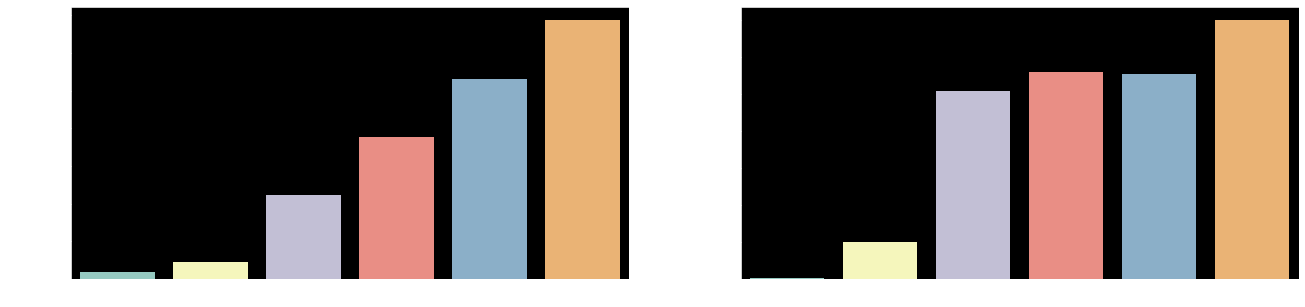

In [202]:
# barplots
fig, ax = plt.subplots(1, 2, figsize=(22,5))

fig.patch.set_alpha(0)

sns.barplot(data=top5MostDeaths_continent, x='location', y='total_cases', ax=ax[0], order=['Oceania','Africa','South America','North America', 'Asia', 'Europe'])
ax[0].set_xlabel('')
ax[0].tick_params('both', labelsize=14)
ax[0].set_ylabel('Total cases', weight='bold', fontsize=18)
ax[0].yaxis.set_major_formatter(tools.reformat_large_tick_values);

sns.barplot(data=top5MostDeaths_continent, x='location', y='total_deaths', ax=ax[1], order=['Oceania','Africa','South America','North America', 'Asia', 'Europe'])
ax[1].set_xlabel('')
ax[1].tick_params('both', labelsize=14)
ax[1].set_ylabel('Total deaths', weight='bold', fontsize=18)
ax[1].yaxis.set_major_formatter(tools.reformat_large_tick_values);

plt.savefig("plots/total_cases_deaths_continent.png", transparent=True)

Overall, the total number of deaths and cases was higher in **Europe**, followed by **North America** (deaths) and **Asia** (cases). This, however, could be partially explained by the availability of testing in these continents, especially in countries with higher income. 

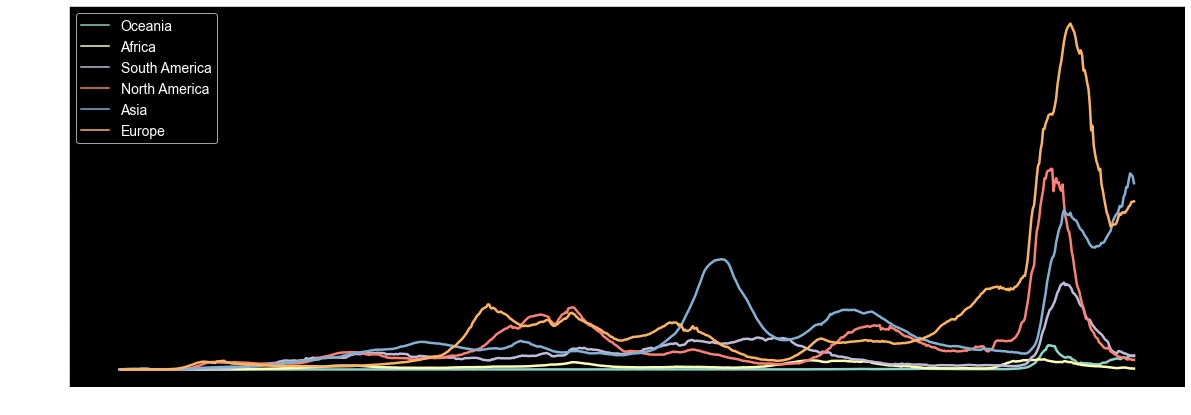

In [203]:
fig, ax = plt.subplots(figsize=(20,7))

fig.patch.set_alpha(0)

sns.lineplot(data=df_continent, x='date', y='new_cases_smoothed', hue='location', linewidth=2.5, ax=ax, hue_order=['Oceania','Africa','South America','North America', 'Asia', 'Europe']);
ax.set_xlabel('')
ax.tick_params('both', labelsize=14)
ax.legend(fontsize=14)
ax.set_ylabel('New cases (Smoothed)', weight='bold', fontsize=18);
ax.yaxis.set_major_formatter(tools.reformat_large_tick_values);

plt.savefig("plots/lineplot_newCasesSmoothed_continent.png", transparent=True)

When we look at the new cases confirmed, using the smoothed values, a sharp increase in the number of new reported cases in January 2022 is noticed. This is consistend with the Omicron variant, which spread with alarming rates when it appeared.

### Income-based analysis

Now, checking the data based on the income of the countries.

In [204]:
# Extracting and ordering by most deaths
top5MostDeaths_income = df_income.loc[df_income.date == "2022-03-20"].sort_values(by="total_deaths", ascending=False)
top5MostDeaths_income 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,gdp_per_capita,human_development_index,population
162217,OWID_UMC,NaN,Upper middle income,2022-03-20,123064003.0,121290.0,177814.000,2476195.0,1182.0,1585.286,...,6748395.0,195.24,80.95,31.30,2685.0,554526.0,0.022,NaN,NaN,2.513673e+09
68084,OWID_HIC,NaN,High income,2022-03-20,258372770.0,722989.0,1306109.286,2266661.0,1286.0,2972.571,...,1984348.0,192.97,78.90,43.49,1633.0,147042.0,0.012,NaN,NaN,1.214930e+09
92054,OWID_LMC,NaN,Lower middle income,2022-03-20,87473866.0,179167.0,285046.286,1291745.0,549.0,606.857,...,7009725.0,108.58,58.57,4.44,2105.0,1584024.0,0.048,NaN,NaN,3.330653e+09
91265,OWID_LIC,NaN,Low income,2022-03-20,1812158.0,170.0,377.429,42915.0,5.0,9.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.651490e+08


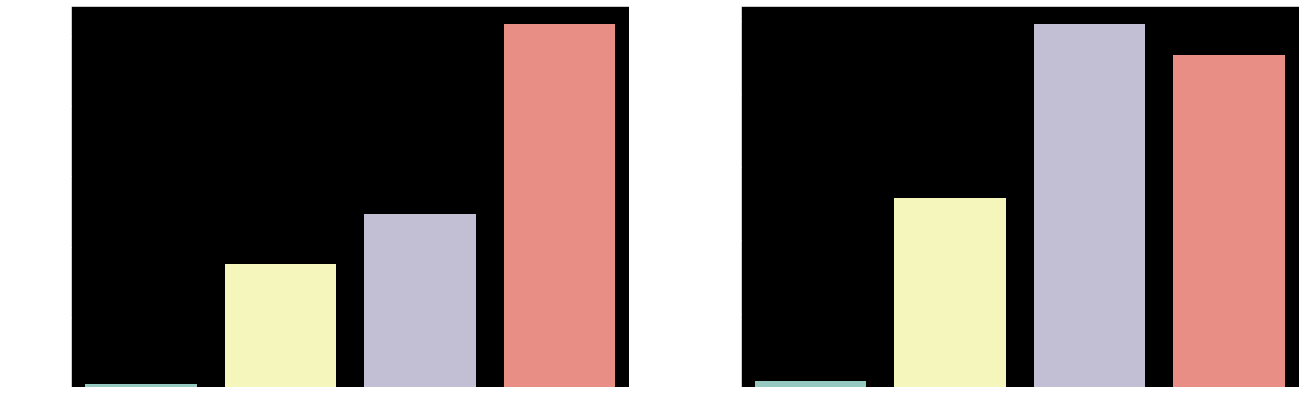

In [205]:
# barplots
fig, ax = plt.subplots(1, 2, figsize=(22,7))

fig.patch.set_alpha(0)

sns.barplot(data=top5MostDeaths_income, x='location', y='total_cases', ax=ax[0], order=['Low income', 'Lower middle income', 'Upper middle income', 'High income'])
ax[0].set_xlabel('')
ax[0].tick_params('both', labelsize=14)
ax[0].set_ylabel('Total cases', weight='bold', fontsize=18)
ax[0].yaxis.set_major_formatter(tools.reformat_large_tick_values);

sns.barplot(data=top5MostDeaths_income, x='location', y='total_deaths', ax=ax[1], order=['Low income', 'Lower middle income', 'Upper middle income', 'High income'])
ax[1].set_xlabel('')
ax[1].tick_params('both', labelsize=14)
ax[1].set_ylabel('Total deaths', weight='bold', fontsize=18)
ax[1].yaxis.set_major_formatter(tools.reformat_large_tick_values);

plt.savefig("plots/total_cases_deaths_income.png", transparent=True)

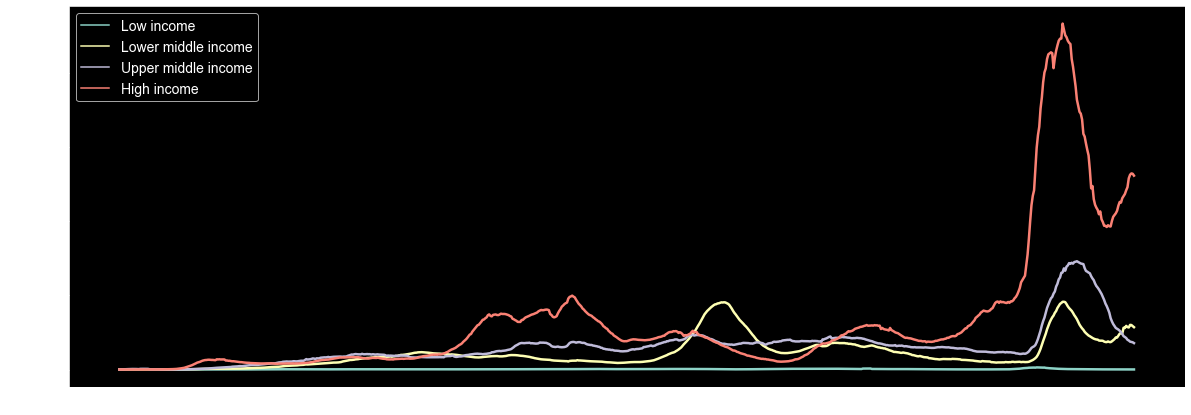

In [206]:
fig, ax = plt.subplots(figsize=(20,7))

fig.patch.set_alpha(0)

sns.lineplot(data=df_income, x='date', y='new_cases_smoothed', hue='location', linewidth=2.5, ax=ax, hue_order=['Low income', 'Lower middle income', 'Upper middle income', 'High income']);
ax.set_xlabel('')
ax.tick_params('both', labelsize=14)
ax.legend(fontsize=14)
ax.set_ylabel('New cases (Smoothed)', weight='bold', fontsize=18)
ax.yaxis.set_major_formatter(tools.reformat_large_tick_values);

plt.savefig("plots/lineplot_newCasesSmoothed_income.png", transparent=True)

From these plots, we can see that **High income** countries dominate in total and new cases, while the total deaths is higher in **Upper middle income** countries.

### Country-based analysis

First, let's see which 5 countries dominate the dataset regarding most deaths and most cases.

In [207]:
# 5 countries with most deaths up until 2022-03-20
top5MostDeaths_countries = df.loc[df.date == "2022-03-20"].sort_values(by="total_deaths", ascending=False).head(5)

# 5 countries with most cases up until 2022-03-20
top5MostCases_countries = df.loc[df.date == "2022-03-20"].sort_values(by="total_cases", ascending=False).head(5)

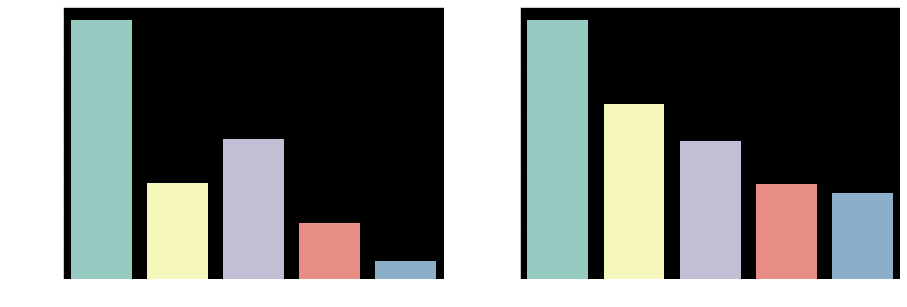

In [208]:
# plotting bar plot of top5 most deaths and cases
fig, ax = plt.subplots(1, 2, figsize=(15,5))

fig.patch.set_alpha(0)

sns.barplot(data=top5MostDeaths_countries, x='location', y='total_cases', ax=ax[0])
ax[0].set_xlabel('')
ax[0].tick_params('both', labelsize=14)
ax[0].set_ylabel('Total cases', weight='bold', fontsize=18)
ax[0].yaxis.set_major_formatter(tools.reformat_large_tick_values);

sns.barplot(data=top5MostDeaths_countries, x='location', y='total_deaths', ax=ax[1])
ax[1].set_xlabel('')
ax[1].tick_params('both', labelsize=14)
ax[1].set_ylabel('Total deaths', weight='bold', fontsize=18)
ax[1].yaxis.set_major_formatter(tools.reformat_large_tick_values);

plt.savefig("plots/total_cases_deaths_top5Countries.png", transparent=True)

Unsurprisingly, we see that the United States, Brazil and India are the top 3 countries with most cases and deaths up until 20th of March, 2022, followed by Russia and Mexico. Let's see how new cases have been reported in these countries:

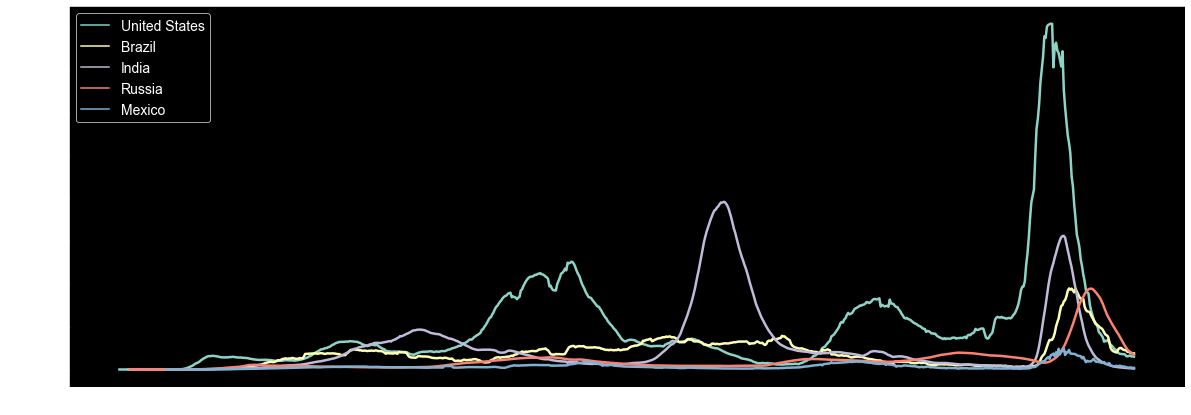

In [209]:
fig, ax = plt.subplots(figsize=(20,7))

fig.patch.set_alpha(0)

sns.lineplot(data=df, x='date', y='new_cases_smoothed', hue='location', linewidth=2.5, ax=ax, hue_order=['United States', 'Brazil', 'India', 'Russia', 'Mexico']);
ax.set_xlabel('')
ax.tick_params('both', labelsize=14)
ax.legend(fontsize=14)
ax.set_ylabel('New cases (Smoothed)', weight='bold', fontsize=18)
ax.yaxis.set_major_formatter(tools.reformat_large_tick_values);

plt.savefig("plots/lineplot_newCasesSmoothed_top5Countries.png", transparent=True)

Here we can see that, even though India and Brazil are the second and third countries with most cases, the number of new cases reported for these countries is very far behind those reported in the United States. Still, Brazil is 2nd in terms of deaths caused by COVID-19, even with less than half the total number of cases in the US.

* Plotar um gráfico de barras para os 5 países com mais mortes
    * `df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]`
    * `ax.bar('location', 'total_deaths', data=top5_total_deaths)`
* Plotar um gráfico de linhas para ver a evolução do total de casos de COVID-19 no mundo.
    * `df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()`
* [OPCIONAL] Plotar um gráfico de dispersão considerando `gdp_per_capita` (ou seja, o PIB dos países) pelo número total de mortos. Pegue a data mais recente apenas.
    * Lembre-se que não é nada conclusivo, pois envolve fatores como proporcão de testes, etc.

### Análise Exploratória para o Brasil

* Criar uma cópia do DataFrame apenas com o Brasil
    * `df_brasil = df.loc[df.location == "Brazil"].copy()`
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

In [210]:
# getting data from Brazil only
df_brasil = df.loc[df.location == "Brazil"].copy()

## Conclusão

*Escreva suas conclusões e análises sobre os dados relativos à COVID-19...*